<a href="https://colab.research.google.com/github/AdityaGita/Olist-Customer-Segmentation/blob/main/olist_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **Fetch The Datasets**

In [ ]:
orders_dataset = 'https://drive.google.com/file/d/1R9g5f310AA1Zmrnmd8P8jclnyToN54Bx/view?usp=sharing'
orders_dataset = 'https://drive.google.com/uc?id=' + orders_dataset.split('/')[-2]
od = pd.read_csv(orders_dataset)
customers_dataset = 'https://drive.google.com/file/d/1S_BzA_P4v26oIvErtB4Ta64fQB53Hw1_/view?usp=sharing'
customers_dataset = 'https://drive.google.com/uc?id=' + customers_dataset.split('/')[-2]
cd = pd.read_csv(customers_dataset)
order_payments_dataset ='https://drive.google.com/file/d/1JBzMoiRBy6YsxHoS3OhysRcZZyRh5DQD/view?usp=sharing'
order_payments_dataset = 'https://drive.google.com/uc?id=' + order_payments_dataset.split('/')[-2]
opd = pd.read_csv(order_payments_dataset)

**Display orders_dataset**

In [ ]:
od.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Display customers_dataset**

In [ ]:
cd.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Display order_payments_dataset**

In [ ]:
opd.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450


In [ ]:
opd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Join All Datasets**

In [ ]:
df = opd.merge(od, on='order_id', how='left' )
df = df.merge(cd, on='customer_id', how='outer')
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.000,credit_card,8.000,99.330,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1.000,credit_card,1.000,24.390,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.000,credit_card,1.000,65.710,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1.000,credit_card,8.000,107.780,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1.000,credit_card,2.000,128.450,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP


# **Data Cleaning**
**Check each columns data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   payment_sequential             103886 non-null  float64
 2   payment_type                   103886 non-null  object 
 3   payment_installments           103886 non-null  float64
 4   payment_value                  103886 non-null  float64
 5   customer_id                    103887 non-null  object 
 6   order_status                   103886 non-null  object 
 7   order_purchase_timestamp       103886 non-null  object 
 8   order_approved_at              103711 non-null  object 
 9   order_delivered_carrier_date   101998 non-null  object 
 10  order_delivered_customer_date  100754 non-null  object 
 11  order_estimated_delivery_date  103886 non-null  object 
 12  customer_unique_id            

**Change dtype from object to datetime64[ns]**

In [ ]:
datetime = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for col in datetime:
  df[col] = pd.to_datetime(df[col], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_sequential             103886 non-null  float64       
 2   payment_type                   103886 non-null  object        
 3   payment_installments           103886 non-null  float64       
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103887 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 10  order_delivered_customer_date  100754 non-null  datetime64[ns]
 11  

**Removing Irrelevant Values**

In [ ]:
dc = df.copy()

In [ ]:
dc = dc.drop(columns=['payment_sequential','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103886 non-null  object        
 1   payment_type              103886 non-null  object        
 2   payment_installments      103886 non-null  float64       
 3   payment_value             103886 non-null  float64       
 4   customer_id               103887 non-null  object        
 5   order_status              103886 non-null  object        
 6   order_purchase_timestamp  103886 non-null  datetime64[ns]
 7   customer_unique_id        103887 non-null  object        
 8   customer_zip_code_prefix  103887 non-null  int64         
 9   customer_city             103887 non-null  object        
 10  customer_state            103887 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usag

**String Manipulation by changing column name from 'order_purchase_timestamp' to 'order_time'**

In [ ]:
dc.rename(columns={'order_purchase_timestamp': 'order_time'}, inplace = True)
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103886 non-null  object        
 1   payment_type              103886 non-null  object        
 2   payment_installments      103886 non-null  float64       
 3   payment_value             103886 non-null  float64       
 4   customer_id               103887 non-null  object        
 5   order_status              103886 non-null  object        
 6   order_time                103886 non-null  datetime64[ns]
 7   customer_unique_id        103887 non-null  object        
 8   customer_zip_code_prefix  103887 non-null  int64         
 9   customer_city             103887 non-null  object        
 10  customer_state            103887 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usag

**Handling Missing Values by Dropping All Missing Values**

In [ ]:
dc = dc.dropna()
dc.shape

(103886, 11)

**Handling Duplicate Values**

In [ ]:
dc[dc.duplicated()]

,order_id,payment_type,payment_installments,payment_value,customer_id,order_status,order_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
128,ea9184ad433a404df1d72fa0a8764232,voucher,1.000,22.490,92f70647283582ec50ca1bb5794f6c90,delivered,2018-08-20 20:10:03,9655822fce78843a1c9fa79e6180346c,85806,cascavel,PR
129,ea9184ad433a404df1d72fa0a8764232,voucher,1.000,22.490,92f70647283582ec50ca1bb5794f6c90,delivered,2018-08-20 20:10:03,9655822fce78843a1c9fa79e6180346c,85806,cascavel,PR
197,591083bc42b589c7052118aa83118e76,voucher,1.000,20.000,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,94bd5dee83e9590368179f4ab026b4f4,95097,caxias do sul,RS
198,591083bc42b589c7052118aa83118e76,voucher,1.000,20.000,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,94bd5dee83e9590368179f4ab026b4f4,95097,caxias do sul,RS
200,591083bc42b589c7052118aa83118e76,voucher,1.000,20.000,276df8efcf9602ecddaa00e349eb79b3,delivered,2018-01-02 22:09:17,94bd5dee83e9590368179f4ab026b4f4,95097,caxias do sul,RS
...,...,...,...,...,...,...,...,...,...,...,...
65765,3343cf23583ffaea36e75f03d0893bde,voucher,1.000,50.000,449da50336d9b1e5f45284b5e4647f48,delivered,2017-12-10 11:48:07,d21a5e86eb6ff84f226ee572687e25b3,4777,sao paulo,SP
72581,401ecf90579c9023a8f503e3a58cfa77,voucher,1.000,20.000,3a67fbf582c0eceb6d18beca1fe47a1b,delivered,2017-10-23 22:15:15,90c205b0bed658a20ba141d2960d6811,89930,sao jose do cedro,SC
75437,233868ed9e2f9399d292289f27bc2993,voucher,1.000,33.030,70a6da4bfbfe2520b1db2523499c330b,delivered,2017-09-27 04:24:28,c09b86243811785f524f5b2d711f61bb,2998,sao paulo,SP
80500,b485e99d1c3896c44eb56886216fcd01,voucher,1.000,20.000,5b58f75e65bdec4f6767eb82f2c84e66,delivered,2017-08-04 14:38:32,146265db442ac781517deaa33d1be2d0,20521,rio de janeiro,RJ


**Drop Duplicate Values**

In [ ]:
dc = dc.drop_duplicates(keep=False)
dc.shape

(102965, 11)

**Handling Duplicate Values 2**

In [ ]:
dc[dc['order_id'].duplicated()].shape

(3537, 11)

**Drop Duplicate Values 2**

In [ ]:
dc_dup = dc.drop_duplicates(['order_id'], keep=False)
dc_dup.shape

(96650, 11)

**Handling Outliers by Checking Both float64 datatype which is 'payment_installments' and 'payment_value' column**

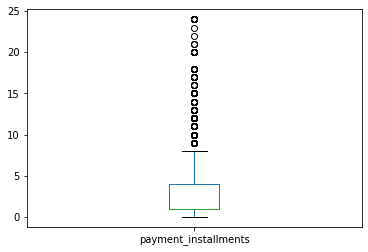

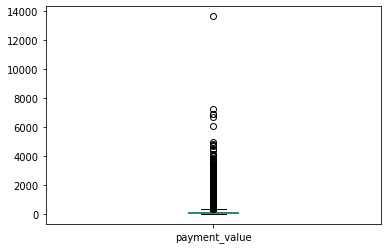

In [ ]:
outliers = ['payment_installments','payment_value']

for cols in dc[outliers]:
  dc.boxplot(column = [cols])
  plt.grid(False)
  plt.show()

In [ ]:
dc[outliers].describe()

,payment_installments,payment_value
count,102965.000,102965.000
mean,2.869,155.203
std,2.693,218.101
min,0.000,0.000
25%,1.000,57.680
50%,1.000,100.650
75%,4.000,172.700
max,24.000,13664.080


**Checking which Values are outliers by using Q1 - 1,5 IQR & Q3 + 1,5 IQR**

In [ ]:
def count_outliers(columns_name_with_outliers):
    outliers_list = []
    for i in columns_name_with_outliers:
        low_outliers = dc[i].describe()[4] - 1.5*abs(dc[i].describe()[4] - dc[i].describe()[6])
        upper_outliers =  dc[i].describe()[6] + 1.5*abs(dc[i].describe()[4] - dc[i].describe()[6])
        print(i + f' outliers is < {low_outliers}, and > {upper_outliers}')
        outliers_list.append([i,low_outliers,upper_outliers])
    for i in range(len(outliers_list)):
        outliers_count_bottom = dc[dc[outliers_list[i][0]] < outliers_list[i][1]][outliers_list[i][0]].count()
        outliers_count_upper = dc[dc[outliers_list[i][0]] > outliers_list[i][2]][outliers_list[i][0]].count()
        print(f'numbers outliers in columns {outliers_list[i][0]} is bottom outliers = {outliers_count_bottom} and upper outliers = {outliers_count_upper} ')
count_outliers(outliers)

payment_installments outliers is < -3.5, and > 8.5
payment_value outliers is < -114.84999999999997, and > 345.22999999999996
numbers outliers in columns payment_installments is bottom outliers = 0 and upper outliers = 6311 
numbers outliers in columns payment_value is bottom outliers = 0 and upper outliers = 7940 


In [ ]:
filter_value_min = dc['payment_value'] < -114.84999999999997 
filter_value_max = dc['payment_value'] > 345.22999999999996  

dc_outlier = dc[(filter_value_min|filter_value_max)]
dc_outlier['payment_value'].count()

7940

In [ ]:
dc_outlier['payment_value'].count()/dc['payment_value'].count()

0.07711358228524255

7,7 % payment_value that have outliers >> can't ignore
<p> so we'll drop that values

In [ ]:
dc = dc[~((dc['payment_value'] < -114.84999999999997) | (dc['payment_value'] > 345.22999999999996))]
dc.shape

(95025, 11)

In [ ]:
filter_insta_min = dc['payment_installments'] < -3.5 
filter_insta_max = dc['payment_installments'] > 8.5 

dc_outlier = dc[(filter_insta_min|filter_insta_max)]
dc_outlier['payment_installments'].count()

4240

In [ ]:
dc_outlier['payment_installments'].count()/dc['payment_installments'].count()

0.044619836885030253

4,4 % payment_installments that have outliers >> can't ignore
<p> so we'll drop that values

In [ ]:
dc = dc[~((dc['payment_installments'] < -3.5) | (dc['payment_installments'] > 8.5))]
dc.shape

(90785, 11)

# **EDA**
**Descriptive Statistics**

In [ ]:
from scipy import stats

def describe(df, statis):
  d = df.describe()
  if 'mode' in statis:
    statis.remove('mode')
    d = d.append(df.agg(statis))
    d = d.append(df.agg(lambda x: stats.mode(x)[0]))
  else: 
    d = d.append(df.agg(statis))
  return d

In [ ]:
exclude = dc.drop(columns=['order_time','customer_zip_code_prefix','order_id'],axis=1)
num_features = exclude.select_dtypes(exclude=[np.object]).columns
cat_features = exclude.select_dtypes(include=[np.object]).columns

<ipython-input-31-692ec98037bc>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_features = exclude.select_dtypes(exclude=[np.object]).columns
<ipython-input-31-692ec98037bc>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = exclude.select_dtypes(include=[np.object]).columns


In [ ]:
describe(dc[num_features], ['skew','kurt','mode','var'])

,payment_installments,payment_value
count,90785.000,90785.000
mean,2.297,107.608
std,1.883,71.246
min,0.000,0.000
25%,1.000,53.300
50%,1.000,88.560
75%,3.000,146.580
max,8.000,345.190
skew,1.514,1.061
kurt,1.450,0.684


In [ ]:
from scipy.stats import variation
for i in range(len(num_features)):
  cv = variation(dc[num_features[i]], axis = 0)
  print(f'coefficient of variation {num_features[i]} is {cv} ')

for i in range(len(num_features)):
  range = dc[num_features[i]].describe()[7] - df[num_features[i]].describe()[3]
  print(f'range {num_features[i]} is {range} ')

coefficient of variation payment_installments is 0.8199829482249312 
coefficient of variation payment_value is 0.6620820270522069 
range payment_installments is 8.0 
range payment_value is 345.19 


**Insights of Descriptive Statistics**
1.   payment_installments has mean (2.297) > median (1) with min value is 0 and max value is 8, so we can say that payment_installments has positive skewed and because skew value (1.514) is greater than 1, the data are extremely skewed.
2.  payment_value has mean (107.608) > median (88.560) with min value is 0 and max value is 345.190, so we can say that payment_installments has positive skewed and because skew value (1.061) is greater than 1, the data are extremely skewed but less extreme than data in payment_installments



# **Number of Orders per Month**

In [ ]:
q = df.copy()
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_sequential             103886 non-null  float64       
 2   payment_type                   103886 non-null  object        
 3   payment_installments           103886 non-null  float64       
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103887 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 10  order_delivered_customer_date  100754 non-null  datetime64[ns]
 11  

In [ ]:
drop_col = ['payment_sequential','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
q = q.drop(columns = drop_col)
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103886 non-null  object        
 1   payment_type              103886 non-null  object        
 2   payment_installments      103886 non-null  float64       
 3   payment_value             103886 non-null  float64       
 4   customer_id               103887 non-null  object        
 5   order_status              103886 non-null  object        
 6   order_purchase_timestamp  103886 non-null  datetime64[ns]
 7   customer_unique_id        103887 non-null  object        
 8   customer_zip_code_prefix  103887 non-null  int64         
 9   customer_city             103887 non-null  object        
 10  customer_state            103887 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usag

In [ ]:
q.duplicated().sum()

614

In [ ]:
q.drop_duplicates(keep = 'first', inplace = True)
q.duplicated().sum()

0

In [ ]:
q.isna().sum()

order_id                    1
payment_type                1
payment_installments        1
payment_value               1
customer_id                 0
order_status                1
order_purchase_timestamp    1
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
q = q.dropna()

In [ ]:
q['year'] = q['order_purchase_timestamp'].dt.year
q['month'] = q['order_purchase_timestamp'].dt.strftime('%b')
q['date'] = q['order_purchase_timestamp'].dt.day
q['day'] = q['order_purchase_timestamp'].dt.strftime('%a')
q['hour'] = q['order_purchase_timestamp'].dt.hour
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103272 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103272 non-null  object        
 1   payment_type              103272 non-null  object        
 2   payment_installments      103272 non-null  float64       
 3   payment_value             103272 non-null  float64       
 4   customer_id               103272 non-null  object        
 5   order_status              103272 non-null  object        
 6   order_purchase_timestamp  103272 non-null  datetime64[ns]
 7   customer_unique_id        103272 non-null  object        
 8   customer_zip_code_prefix  103272 non-null  int64         
 9   customer_city             103272 non-null  object        
 10  customer_state            103272 non-null  object        
 11  year                      103272 non-null  int64         
 12  mo

In [ ]:
q.head()

,order_id,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,date,day,hour
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8.000,99.330,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,2018,Apr,25,Wed,22
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1.000,24.390,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,2018,Jun,26,Tue,11
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1.000,65.710,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,2017,Dec,12,Tue,11
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8.000,107.780,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,2017,Dec,6,Wed,12
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2.000,128.450,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,4291db0da71914754618cd789aebcd56,18570,conchas,SP,2018,May,21,Mon,13


In [ ]:
num_orders = pd.pivot_table(q,index=['year', 'month'], aggfunc={'order_id': lambda x: len(x.unique())})
num_orders = num_orders.reset_index().rename(columns={'order_id': 'count'})
num_orders

,year,month,count
0,2016,Dec,1
1,2016,Oct,324
2,2016,Sep,3
3,2017,Apr,2404
4,2017,Aug,4331
5,2017,Dec,5673
6,2017,Feb,1780
7,2017,Jan,800
8,2017,Jul,4026
9,2017,Jun,3245


In [ ]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
num_orders['months'] = num_orders['month'].apply(lambda x:ordered_months.index(x))
num_orders = num_orders.sort_values('months')
num_orders


,year,month,count,months
18,2018,Jan,7269,0
7,2017,Jan,800,0
17,2018,Feb,6728,1
6,2017,Feb,1780,1
10,2017,Mar,2682,2
21,2018,Mar,7211,2
3,2017,Apr,2404,3
15,2018,Apr,6939,3
11,2017,May,3700,4
22,2018,May,6873,4


Text(0, 0.5, 'Number of Orders')

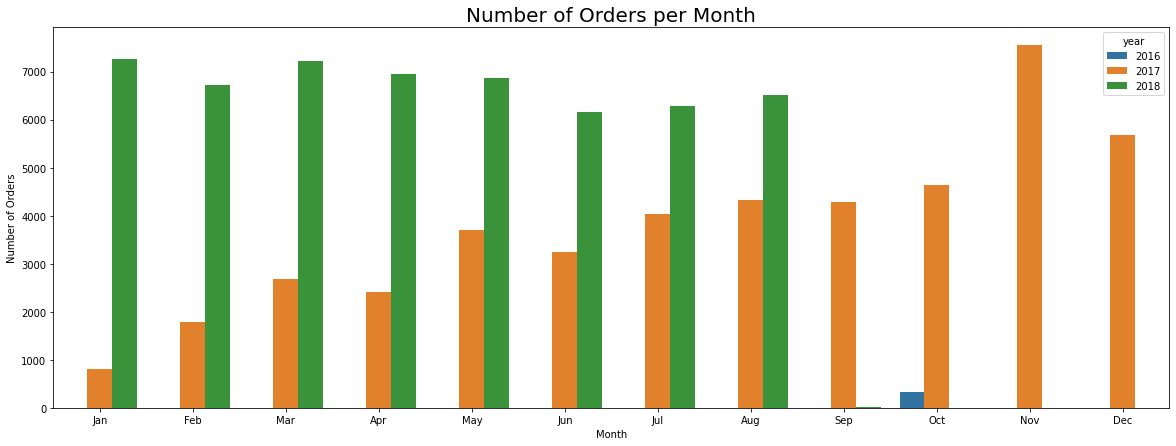

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x='month',y='count',data=num_orders, hue='year')
plt.title('Number of Orders per Month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Orders')

**Insights from Number of Orders per Month Chart:**

1.   In 2017, there is gradually increment since Januari to November then Drop in December, then start from January 2018, bar trend is quite stable
2.   The Highest orders happened in November 2017, which had 7544 order in a month



# **Daily Orders Trend (Which Day of Weeks is The Busiest)**

In [ ]:
weekday_orders = q.groupby('day', as_index=False)['order_id'].nunique()
weekday_orders

,day,order_id
0,Fri,14122
1,Mon,16196
2,Sat,10887
3,Sun,11960
4,Thu,14760
5,Tue,15963
6,Wed,15552


In [ ]:
weekday_ordersa = q.groupby(['day'])['order_id'].nunique().sort_values(ascending=False).reset_index()
weekday_ordersa

,day,order_id
0,Mon,16196
1,Tue,15963
2,Wed,15552
3,Thu,14760
4,Fri,14122
5,Sun,11960
6,Sat,10887


Text(0, 0.5, 'Number of Orders')

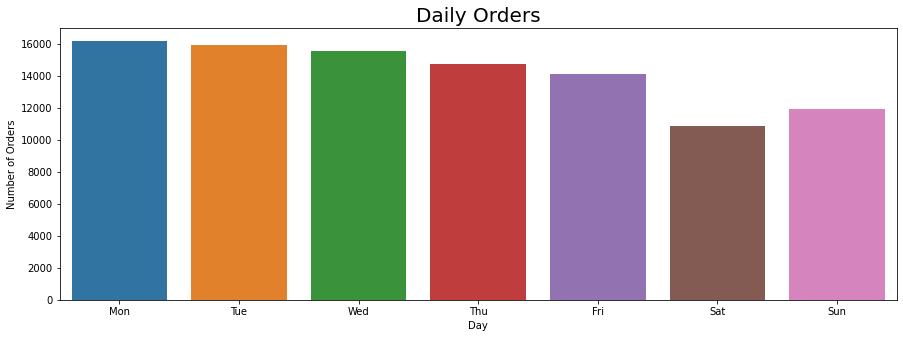

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='day',y='order_id', data=weekday_orders, order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Daily Orders', fontsize=20)
plt.xlabel('Day')
plt.ylabel('Number of Orders')

**Insights from Daily Orders Chart:**

1.   The busiest day is Monday which has 16196 orders
2.   Unfortunetaly, Weekend day (Saturday dan Sunday) became the day that has lowest order

# **Percentage of Orders per Payment Type**

In [ ]:
payment_type = q['payment_type'].value_counts().sort_values()/len(q['payment_type'])*100
payment_type = pd.DataFrame(payment_type).reset_index().rename(columns={'index': 'payment_type','payment_type':'percentage'})
payment_type = payment_type.sort_values('percentage', ascending= False)
payment_type

,payment_type,percentage
4,credit_card,74.350
3,boleto,19.157
2,voucher,5.009
1,debit_card,1.481
0,not_defined,0.003


In [ ]:
modif = payment_type.copy()
modif.loc[modif['percentage'] < 5,'payment_type'] = 'others'
modif = modif.groupby('payment_type')['percentage'].sum().reset_index()
modif

,payment_type,percentage
0,boleto,19.157
1,credit_card,74.350
2,others,1.483
3,voucher,5.009


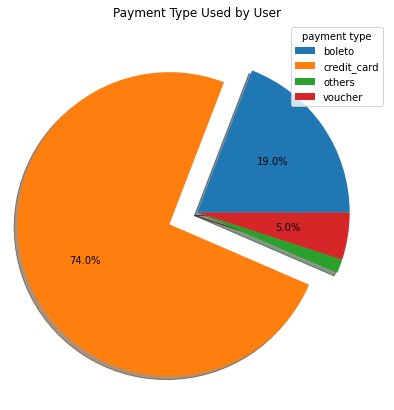

In [ ]:
pie, ax = plt.subplots(figsize=[15,7])
explode = (0, 0.2, 0, 0)
plt.pie(modif['percentage'],explode=explode,shadow=True,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 2 else '')
plt.title('Payment Type Used by User')
plt.legend(modif['payment_type'],loc=1,title='payment type')
plt.show()

**Insights from Pie Chart Above:**

About 74% of transactions made by users are using credit cards and 19 % using boleto

# **Cluster Segmentation using RFM Analysis**

In [ ]:
cs = df.copy()
cs.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.000,credit_card,8.000,99.330,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1.000,credit_card,1.000,24.390,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.000,credit_card,1.000,65.710,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1.000,credit_card,8.000,107.780,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1.000,credit_card,2.000,128.450,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [ ]:
cs = cs.drop(columns= ['payment_sequential','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)
cs.head()

,order_id,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8.000,99.330,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1.000,24.390,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1.000,65.710,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8.000,107.780,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2.000,128.450,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [ ]:
cs.isna().sum()

order_id                    1
payment_type                1
payment_installments        1
payment_value               1
customer_id                 0
order_status                1
order_purchase_timestamp    1
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
cs.dropna(inplace=True)

In [ ]:
rfm_data = cs.copy()
max_date = max(cs['order_purchase_timestamp'])
rfm_data = cs.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (max_date - x.max()).days,'order_id':'count','payment_value':'sum'}).reset_index()
rfm_data.columns =['customer_id','recency','frequency','monetary']
rfm_data

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190
2,0000f46a3911fa3c0805444483337064,585,1,86.220
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.620
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.890
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,2067.420
96091,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.580
96092,ffff371b4d645b6ecea244b27531430a,617,1,112.460
96093,ffff5962728ec6157033ef9805bacc48,168,1,133.690


In [ ]:
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [ ]:
inertia = {}

for k in range(2,13):
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_data[['monetary']])
    inertia[k] = km.inertia_

plt.figure(figsize=(8,5))
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

TypeError: ignored

In [ ]:
r_labels = k_means_group(rfm_data[['recency']],5,1,asc=True)
f_labels = k_means_group(rfm_data[['frequency']],5,1)
m_labels = k_means_group(rfm_data[['monetary']],5,1)

rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels) 
rfm_data


**Segmentation on RFM**

---



| Segment Name               | Range of R values | Range of F and M Average |
|----------------------------|-------------------|--------------------------|
| Champions                  |       4 - 5       |           4 - 5          |
| Loyal Customers            |       2 - 5       |           3 - 5          |
| Potential Loyalist         |       3 - 5       |           1 - 3          |
| New Customers              |       4 - 5       |           0 - 1          |
| Promising                  |       3 - 4       |           0 - 1          |
| Customers Needing Attetion |       2 - 3       |           2 - 3          |
| About to Sleep             |       2 - 3       |           0 - 2          |
| At Risk                    |       0 - 2       |           2 - 5          |
| Can't Lose Them            |       0 - 1       |           4 - 5          |
| Hibernating                |       1 - 2       |           1 - 2          |
| Lost                       |       0 - 2       |           0 - 2          |

*source:https://www.putler.com/rfm-analysis/

In [ ]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyalist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [ ]:
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)
rfm_data.head()

In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.3f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
plt.show()

In [ ]:
!pip install squarify
import squarify

In [ ]:
size = rfm_data.groupby('segment').agg(groupsize = ('recency', 'size'))
size

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 10)
squarify.plot(sizes = size['groupsize'], 
              label = size.index,
              color = ['blue','firebrick','white', 'tomato', 'teal', 'olive', 'gold'],
              alpha = 0.5)
plt.title("RFM Segment",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
rfm_data.groupby('segment')['recency','frequency','monetary'].mean().reset_index()

##Conclusion

**70.779% - Potential Loyalist:**

These are recent buyers, spend a good amount and have bought more than once.

<u>CRM Strategy</u>:

* Offer a loyalty program;
* Keep them engaged;
* Personalized and other product recommendations.

**15.389% - About to Sleep:**

These are customers who haven't bought in a long time, but may still buy again.

<u>CRM Strategy</u>:

* Offer discounts;
* Recommendation of popular products.

**11.743% - Hibernating:**

These are customers who have bought a long time ago, only a few times and have spent little

<u>CRM Strategy</u>:

* Standard communication for sending offers;
* Offer relevant products and good deals.

**1.116% - Customer Needing Attetion:**

These are customers who have recently purchased, however are still in doubt whether they will make their next purchase from the company or a competitor.

<u>CRM Strategy</u>:

* Promotional campaigns for a limited time;
* Product recommendations based on their behavior;
* Show the importance of buying with the company.

**0.828% - At Risk:**

These are customers who have spent very little money and buy frequently, but have not bought for a long time

<u>CRM Strategy</u>:

* Send personalized communications and other messages to reconnect;
* Offer good deals.

**0.145% - Loyal Customers:**

These are customers who spend well and often.

<u>CRM Strategy</u>:

* Personalized communication;
* Avoid mass mailing of offers;
* Offer few products, but present products that they are likely to be interested in;
* Ask for product reviews.

**0.001% - Champions:**

These are customers who have bought recently, buy often, and spend a lot.

<u> CRM Strategy</u>:

* Special offers, products and discounts for these customers so they feel valued;
* Ask for reviews and feedbacks constantly;
* Avoid sending massive amounts of offers;
* Personalized communication;
* Give rewards.